## US population dataset
Población mensual de E.U estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años). 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv('/content/drive/MyDrive/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS' # frecuencia mensual

In [4]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Gráfico de la serie

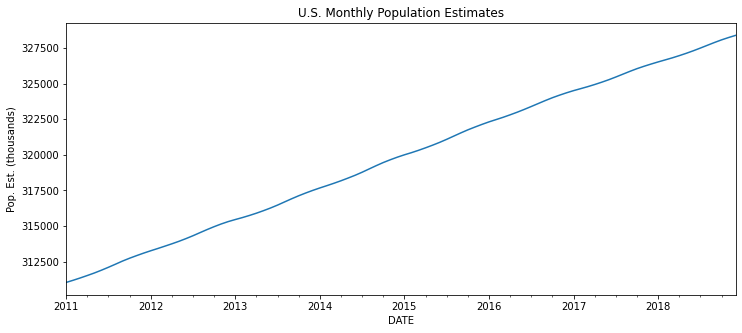

In [5]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

## Datos entrenamiento/prueba


In [6]:
len(df)

96

In [7]:
train = df.iloc[:84]
test = df.iloc[84:]

## Modelo AR(1) 
Modelo auto regresivo de orden 1

In [25]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle') # maxlag=1: para solo coger el  modelo autoregresivo de orden 1 (1 retraso), 
# method='mle': para estimar los coeficientes con el metodo de maxima verosimilitud
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        239.608395
L1.PopEst      0.999249
dtype: float64


In [27]:
# predicciones sobre el conjunto de testeo
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [28]:
predictions1

2018-01-01    326372.439456
2018-02-01    326366.883090
2018-03-01    326361.330897
2018-04-01    326355.782875
2018-05-01    326350.239021
2018-06-01    326344.699331
2018-07-01    326339.163802
2018-08-01    326333.632432
2018-09-01    326328.105216
2018-10-01    326322.582153
2018-11-01    326317.063238
2018-12-01    326311.548469
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [29]:
# Comparando predicciones con valores reales
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326372.4395, expected=326527
predicted=326366.8831, expected=326669
predicted=326361.3309, expected=326812
predicted=326355.7829, expected=326968
predicted=326350.239 , expected=327134
predicted=326344.6993, expected=327312
predicted=326339.1638, expected=327502
predicted=326333.6324, expected=327698
predicted=326328.1052, expected=327893
predicted=326322.5822, expected=328077
predicted=326317.0632, expected=328241
predicted=326311.5485, expected=328393


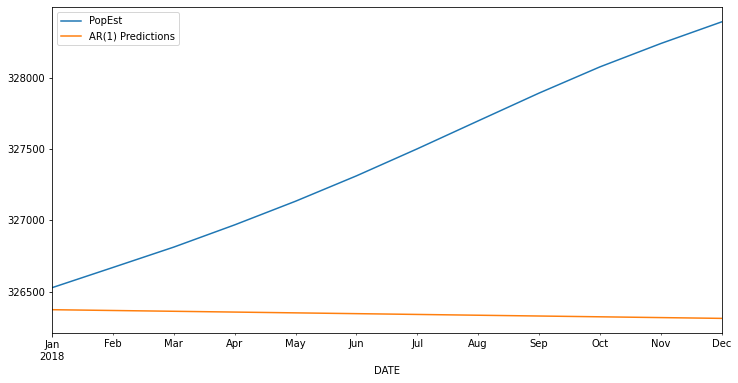

In [30]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Modelo AR(2)

In [31]:
# Recall that our model was already created above based on the training set
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        119.907722
L1.PopEst      1.996371
L2.PopEst     -0.996747
dtype: float64


In [32]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

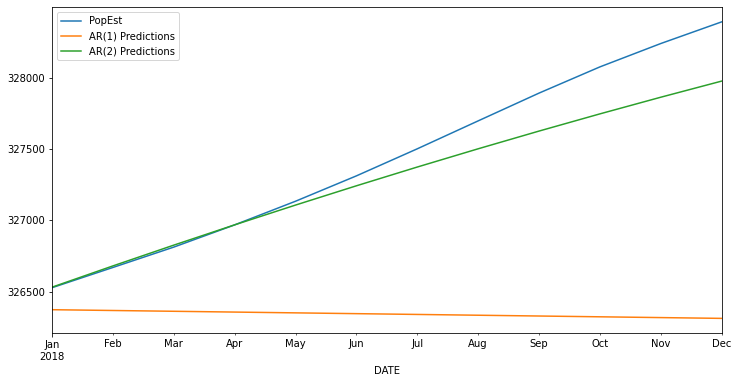

In [33]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Modelo AR(p) donde statsmodels elige p


In [34]:
ARfit = model.fit(ic='bic')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [35]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

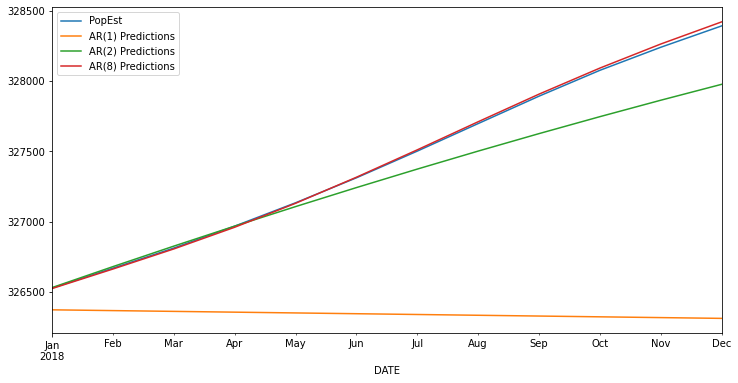

In [36]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

## Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).

In [37]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1584797.132
AR(2) Error: 46289.81783
AR(8) Error: 186.9780964


In [40]:
modls = [AR1fit, AR2fit ,ARfit]

for i in range(3):
  print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

ValueError: ignored

## Predicciones

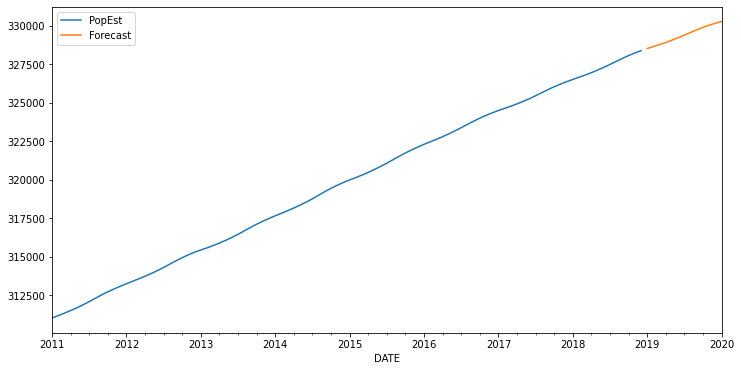

In [41]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=8,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));